<a href="https://colab.research.google.com/github/SriRamK345/ML_sample_DS_Sup_lerning/blob/main/DTree%26RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Sample_dataset/iris.csv')
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


**Getting to know the dataset**

In [3]:
df.shape

(150, 5)

In [4]:
df.variety.value_counts()

,count
variety,
Setosa,50
Versicolor,50
Virginica,50


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


**EDA**

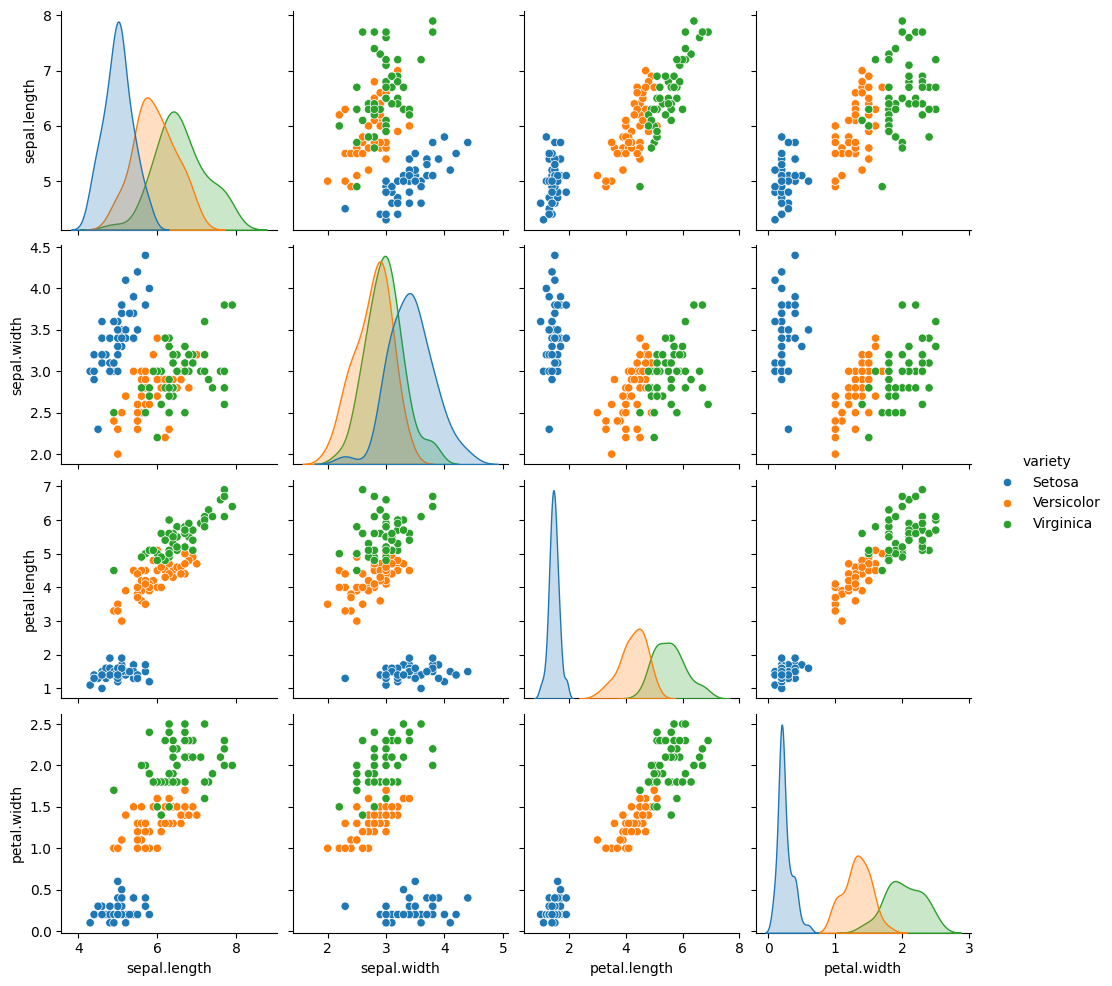

In [6]:
sns.pairplot(df,hue='variety')

In [7]:
df.replace({'variety':{'Setosa':0,'Versicolor':1,'Virginica':2}},inplace=True)

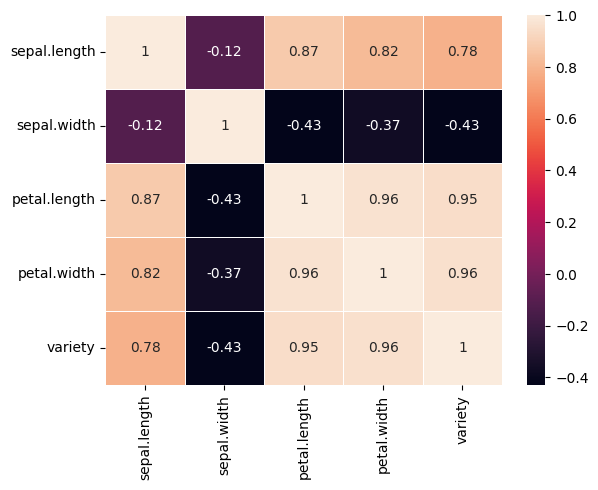

In [8]:
sns.heatmap(df.corr(),annot=True,linewidths= .5)
plt.show()

**Modelling**

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score

In [10]:
X = df.drop('variety',axis=1)
y = df['variety']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [12]:
DT_model = DecisionTreeClassifier()
DT_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [13]:
y_pred = DT_model.predict(X_test)

In [14]:
print(accuracy_score(y_test,y_pred))

1.0


In [15]:
cv_score = cross_val_score(DT_model,X,y,cv=10)
print(cv_score.mean())

0.9533333333333334


In [16]:
print(confusion_matrix(y_test,y_pred))

[[19  0  0]
 [ 0 15  0]
 [ 0  0 16]]


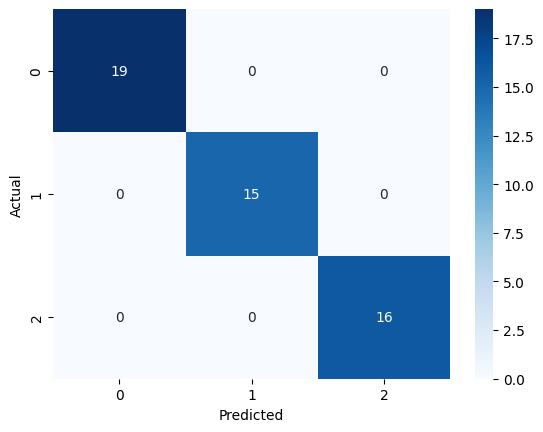

In [17]:
cnf_matrix = pd.DataFrame(confusion_matrix(y_test,y_pred))
sns.heatmap(cnf_matrix,annot=True,fmt='g',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [18]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        16

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [19]:
from sklearn import tree

In [20]:
list_of_features = list(df.columns)
list_of_features.remove('variety')
list_of_features

['sepal.length', 'sepal.width', 'petal.length', 'petal.width']

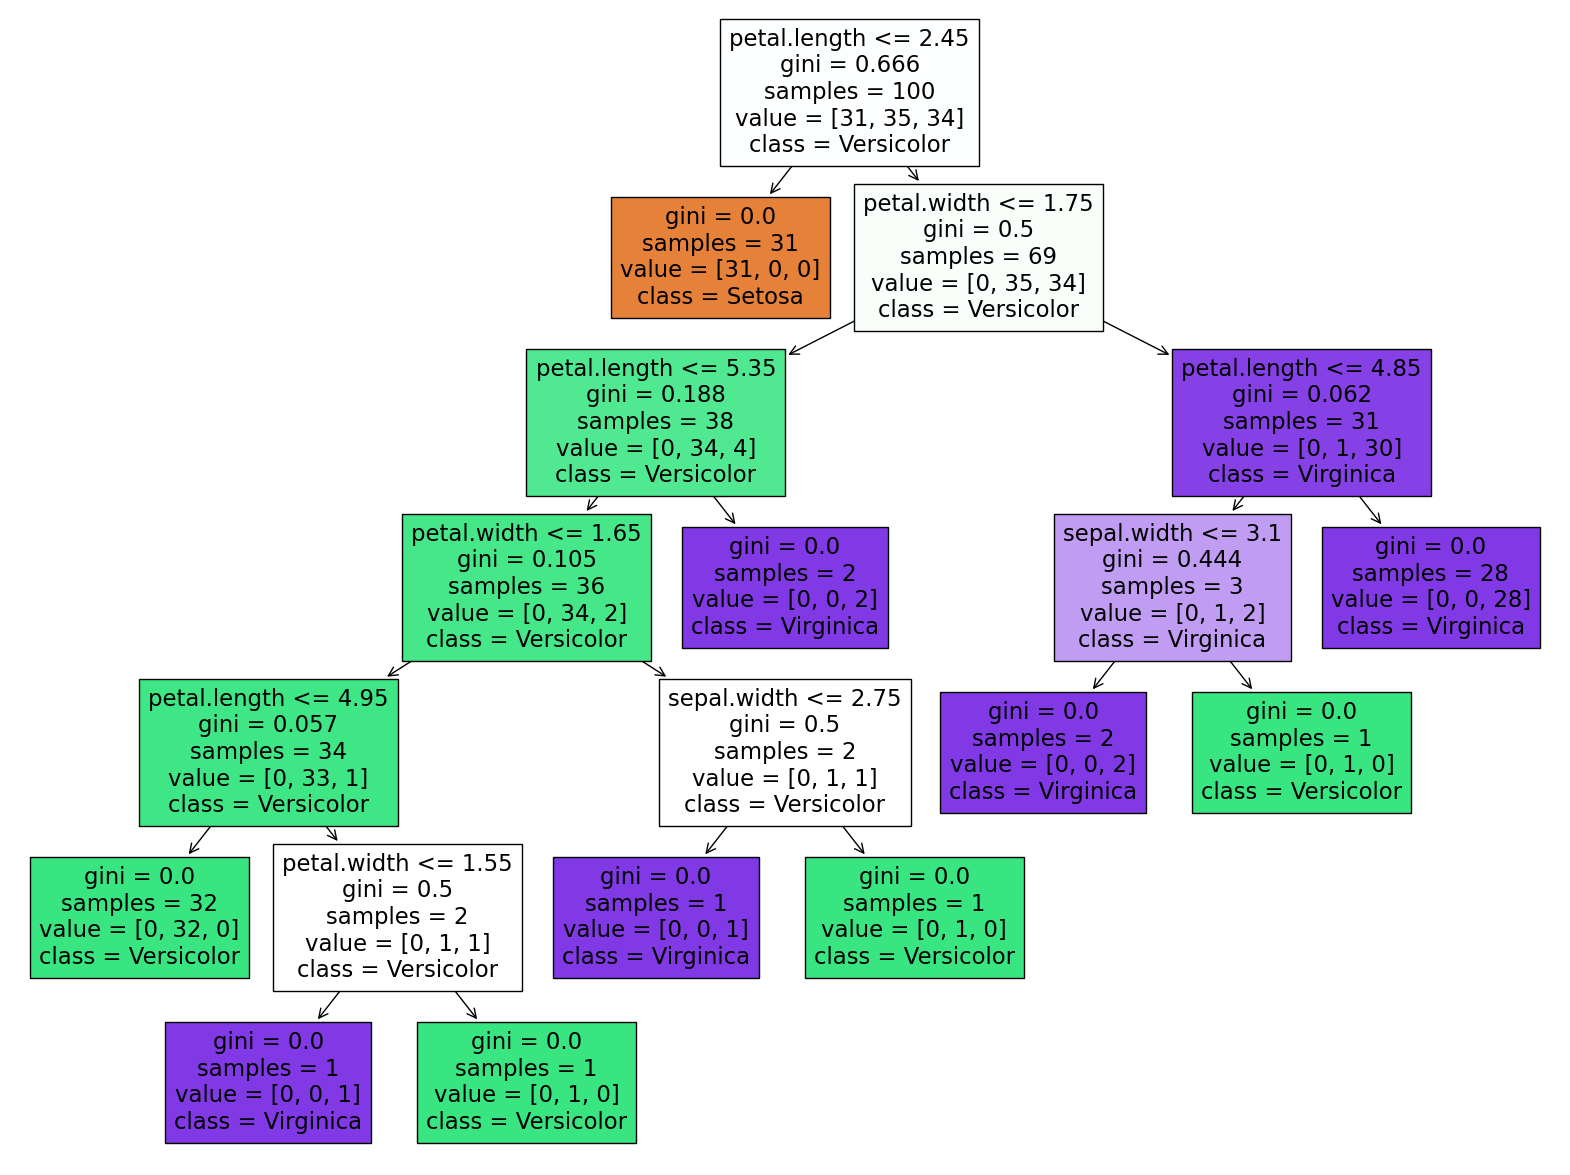

In [21]:
plt.figure(figsize=(20,15))
tree.plot_tree(DT_model,feature_names=list_of_features,class_names=['Setosa','Versicolor','Virginica'],filled=True)
plt.show()

**Hyperperameter Tuning**

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [23]:
DT_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [24]:
df_params = {"criterion" : ["gini","entropy"],
             "max_depth" : [2,4,6,8],
             "max_features" : ["auto" , "sqrt", "log2"]}

In [25]:
df_grid = GridSearchCV(estimator = DT_model, param_grid = df_params,cv=10)
df_grid.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
80 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8],
                         'max_features': ['auto', 'sqrt', 'log2']})

In [26]:
df_grid.best_params_

{'criterion': 'gini', 'max_depth': 4, 'max_features': 'log2'}

In [27]:
dt_tuned = DecisionTreeClassifier(criterion='entropy',max_depth=8,max_features='sqrt')
dt_tuned.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, max_features='sqrt')

In [28]:
y_pred_tuned = dt_tuned.predict(X_test)

In [29]:
print(accuracy_score(y_test,y_pred_tuned))

0.96


In [30]:
print(confusion_matrix(y_test,y_pred_tuned))


[[19  0  0]
 [ 0 14  1]
 [ 0  1 15]]


In [31]:
cv_score_tuned = cross_val_score(dt_tuned,X,y,cv=10)
print(cv_score_tuned.mean())

0.9466666666666667


**Random Forest**

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
RF_model = RandomForestClassifier()
RF_model.fit(X_train,y_train)

RandomForestClassifier()

In [34]:
y_pred_RF = RF_model.predict(X_test)

In [35]:
print(accuracy_score(y_test,y_pred_RF))

0.98


In [36]:
print(confusion_matrix(y_test,y_pred_RF))

[[19  0  0]
 [ 0 15  0]
 [ 0  1 15]]


In [37]:
cv_score_RF = cross_val_score(RF_model,X,y,cv=10)
print(cv_score_RF.mean())

0.9666666666666666


In [41]:
print(classification_report(y_test,y_pred_RF))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



In [40]:
RF_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [39]:
params_RF = {"n_estimators" : [10,20],
             "criterion" : ["gini","entropy"],
             "max_depth" : [2,4,6,8],
             "max_features" : ["auto" , "sqrt", "log2"]}